In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading the file
df=pd.read_excel("D:\SY\\4th SEM\Machine Learning\Project\churn.xlsx","churn")

C:\Users\sandr\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
summary_stats = df.describe()
print(summary_stats)

       Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3325.000000  3325.000000    3325.000000  3324.000000  3324.000000   
mean       101.133534   437.117293       8.089119   179.685800   100.421179   
std         39.880487    42.783711      13.681160    54.407696    20.078482   
min          1.000000   102.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.600000    87.000000   
50%        101.000000   415.000000       0.000000   179.350000   101.000000   
75%        127.000000   510.000000      19.000000   216.200000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Eve Charge   Night Mins    Intl Mins   Intl Calls  Intl Charge  ...  \
count  3324.000000  3324.000000  3323.000000  3323.000000  3323.000000  ...   
mean     17.189468   200.723135    10.278182     4.485498     2.821899  ...   
std       6.402751    50.696037     3.469331     2.

In [5]:
#Finding outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_values = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]  #1.5 (Gaussian distribution)
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_values[col] = outliers.tolist()

for col, values in outlier_values.items():
    print(f"Outliers in '{col}': {values}")

Outliers in 'Account Length': [208.0, 215.0, 209.0, 224.0, 243.0, 217.0, 210.0, 212.0, 232.0, 225.0, 224.0, 225.0, 224.0, 212.0, 210.0, 217.0, 209.0, 221.0, 209.0]
Outliers in 'Area Code': [102.0]
Outliers in 'VMail Message': [48.0, 48.0, 51.0, 49.0, 50.0, 50.0]
Outliers in 'Day Mins': [332.9, 337.4, 326.5, 350.8, 335.5, 30.9, 34.0, 334.3, 346.8, 12.5, 25.9, 0.0, 0.0, 19.5, 329.8, 7.9, 328.1, 27.0, 17.6, 326.3, 345.3, 2.6, 7.8, 18.9, 29.9]
Outliers in 'Day Calls': [158.0, 163.0, 36.0, 40.0, 158.0, 165.0, 30.0, 42.0, 0.0, 45.0, 0.0, 45.0, 160.0, 156.0, 35.0, 42.0, 158.0, 157.0, 45.0, 44.0, 44.0, 44.0, 40.0]
Outliers in 'Eve Charge': [5.26, 29.62, 29.89, 2.65, 29.79, 3.59, 29.52, 5.01, 3.73, 4.5, 3.61, 5.17, 4.98, 4.76, 4.09, 5.1, 29.83, 191.4, 2.59, 226.7, 4.18, 28.89, 30.75, 30.11, 30.91, 0.0, 29.01]
Outliers in 'Night Mins': [57.5, 354.9, 349.2, 345.8, 45.0, 342.8, 364.3, 63.3, 54.5, 50.1, 43.7, 349.7, 352.5, 23.2, 63.6, 381.9, 377.5, 0.0, 367.7, 56.6, 54.0, 64.2, 344.3, 395.0, 350.2,

C:\Users\sandr\AppData\Local\Temp\ipykernel_844\91410239.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\sandr\AppData\Local\Temp\ipykernel_844\91410239.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


# Cleaning

In [6]:
df.isnull().sum() 

State                0
Account Length       3
Area Code            3
Phone                3
Int'l Plan           3
VMail Plan           3
VMail Message        3
Day Mins             4
Day Calls            4
Day Charge           4
Eve Mins             4
Eve Calls            4
Eve Charge           4
Night Mins           4
Night Calls          4
Night Charge         5
Intl Mins            5
Intl Calls           5
Intl Charge          5
CustServ Calls       5
Churn?               6
Unnamed: 21       3326
Unnamed: 22       3326
Unnamed: 23       3326
Unnamed: 24       3326
Unnamed: 25       3326
Unnamed: 26       3327
Unnamed: 27       3327
Unnamed: 28       3327
Unnamed: 29       3327
Unnamed: 30       3327
Unnamed: 31       3327
Unnamed: 32       3327
Unnamed: 33       3327
Unnamed: 34       3327
Unnamed: 35       3327
Unnamed: 36       3327
Unnamed: 37       3327
Unnamed: 38       3327
Unnamed: 39       3327
dtype: int64

In [7]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] #Removing unnamed columns

In [9]:
cleaned_df.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,88,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.
5,AL,118.0,510.0,391-8027,yes,no,0.0,223.4,98.0,37.98,...,101,18.75,203.9,118,9.18,6.3,6.0,1.70,0,False.
6,MA,121.0,510.0,355-9993,no,yes,24.0,218.2,88.0,37.09,...,108,29.62,212.6,118,9.57,7.5,7.0,2.03,3,False.
7,MO,147.0,415.0,329-9001,yes,no,0.0,157.0,79.0,26.69,...,94,8.76,211.8,96,9.53,7.1,6.0,1.92,0,False.
8,LA,117.0,408.0,335-4719,no,no,0.0,184.5,97.0,31.37,...,80,29.89,215.8,90,9.71,8.7,4.0,2.35,1,False.
9,WV,141.0,415.0,330-8173,yes,yes,37.0,258.6,84.0,43.96,...,111,18.87,326.4,97,14.69,11.2,5.0,3.02,0,False.


In [10]:
cleaned_df=cleaned_df.dropna() #removing null values

In [11]:
cleaned_df['Churn?'].unique() #Finding unique values

array(['False.', 'True.', 57, 'FalsÏŒ', 8.49], dtype=object)

In [12]:
cleaned_df['Churn?'] = cleaned_df['Churn?'].astype(str)

cleaned_df = cleaned_df[cleaned_df['Churn?'].isin(['True.', 'False.'])] 

In [13]:
cleaned_df = cleaned_df[cleaned_df["Int'l Plan"].isin(['no', 'yes'])]
cleaned_df = cleaned_df[cleaned_df["VMail Plan"].isin(['no', 'yes'])]

In [14]:
# cleaned_df['Night Charge'] = pd.to_numeric(df['Night Charge'], errors='coerce')

# cleaned_df = df.dropna(subset="Night Charge")

In [15]:
cleaned_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,88,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.


In [16]:
# from matplotlib.pyplot import subplot, title, tight_layout
# import matplotlib.pyplot as plt
# cleaned_df[["State", "Account Length", "Area Code", "Phone", "Int'l Plan", "VMail Plan", "VMail Message",
#     "Day Mins", "Day Calls", "Day Charge","Eve Mins", "Eve Calls", "Eve Charge", "Night Mins",
#     "Night Calls", "Night Charge", "Intl Mins", "Intl Calls", "Intl Charge", "CustServ Calls", "Churn?"]].hist(bins=20, figsize=(10, 10))
# plt.show()
# tight_layout

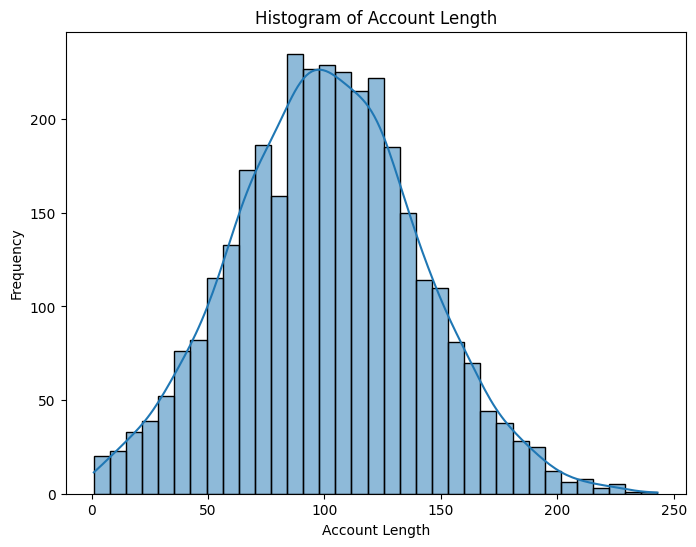

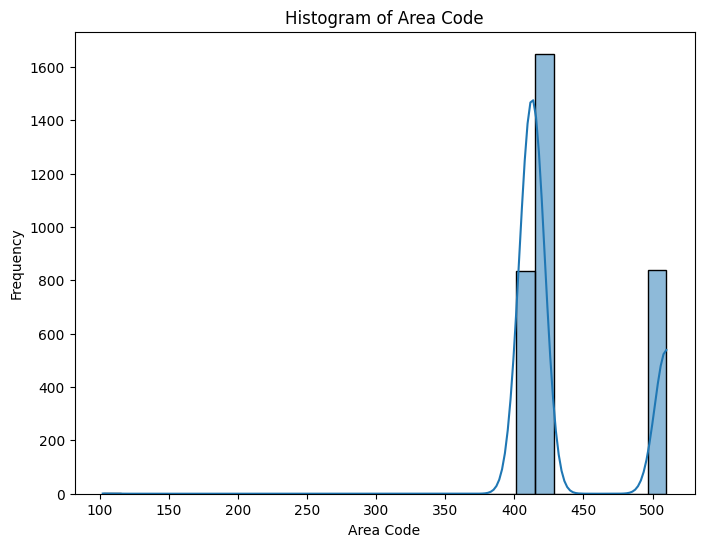

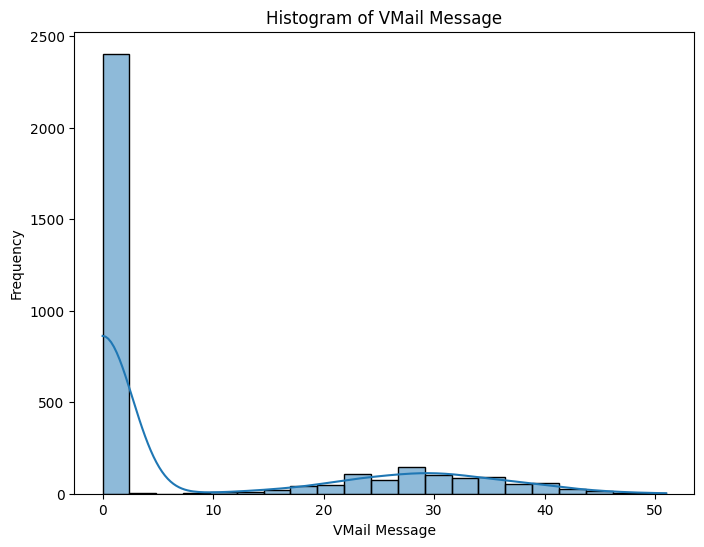

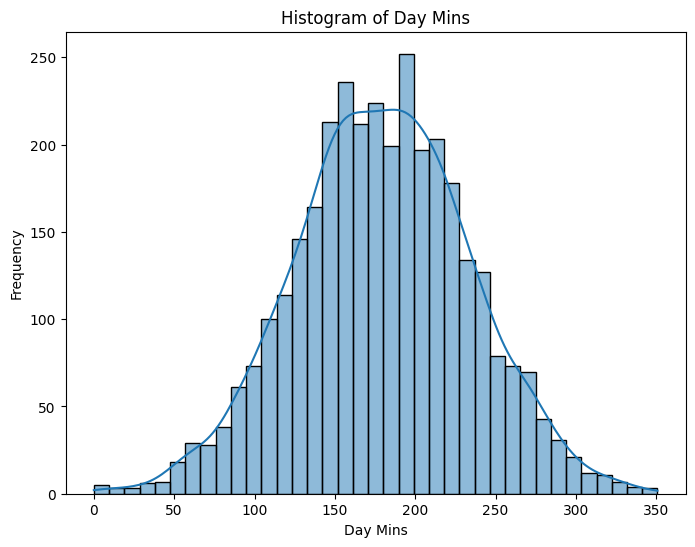

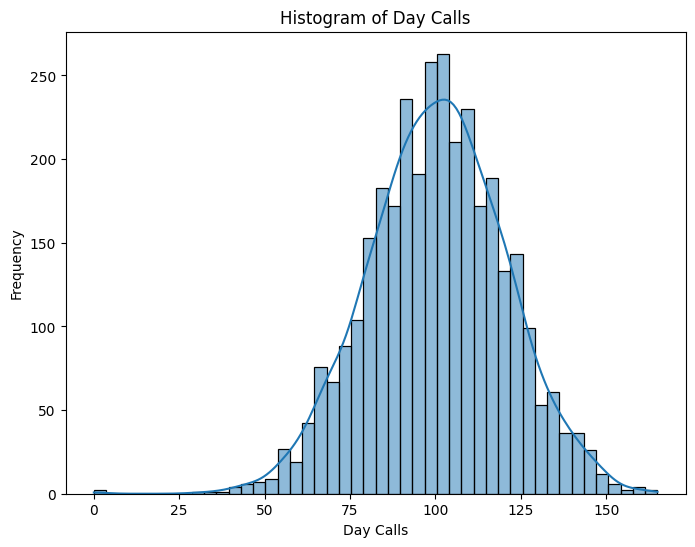

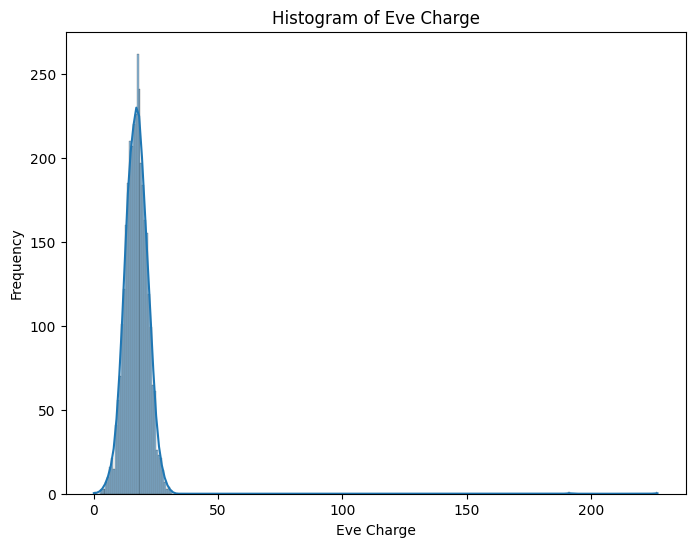

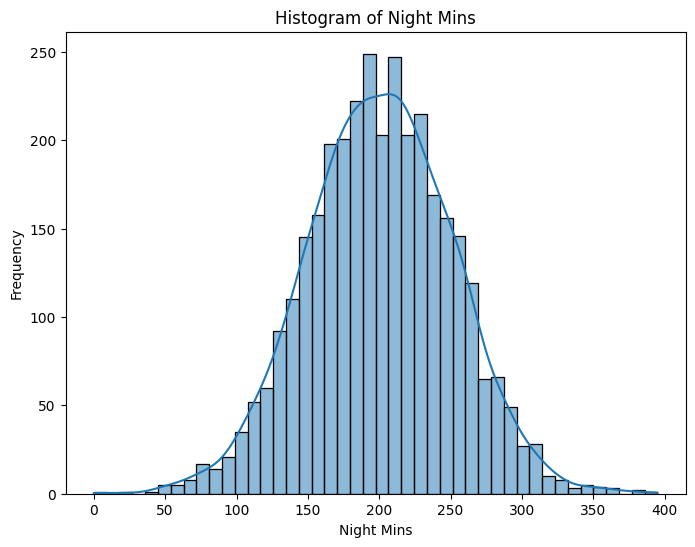

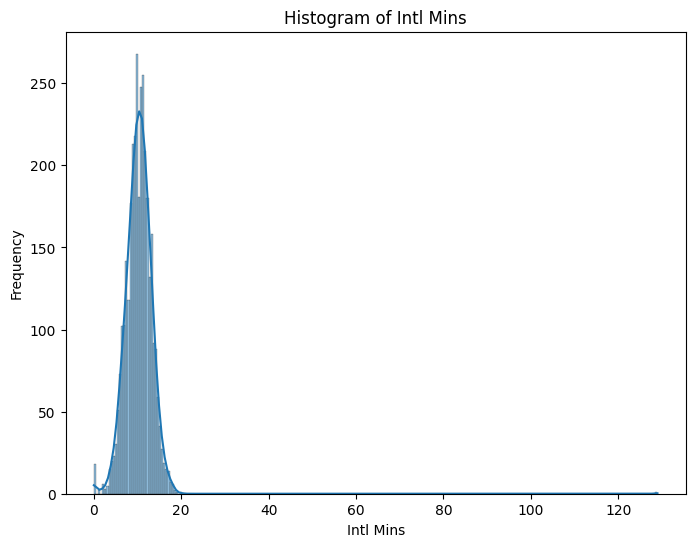

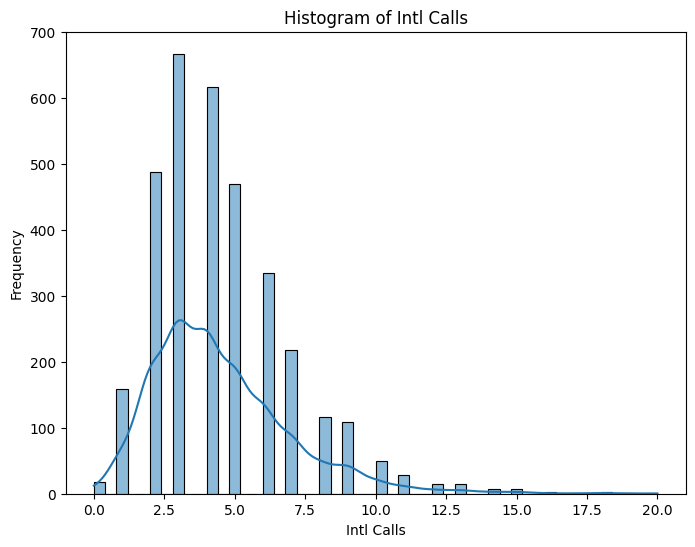

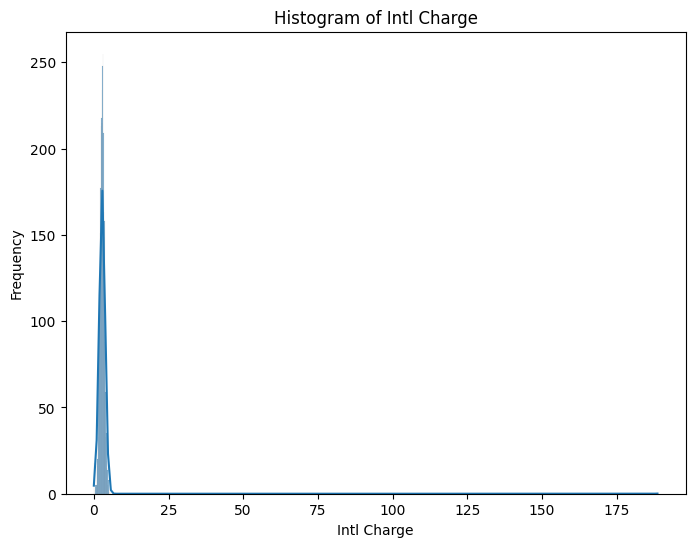

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_attributes = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_attributes:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True) #kernal density estimate (distribution lines)
    plt.title(f'Histogram of {col}') 
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

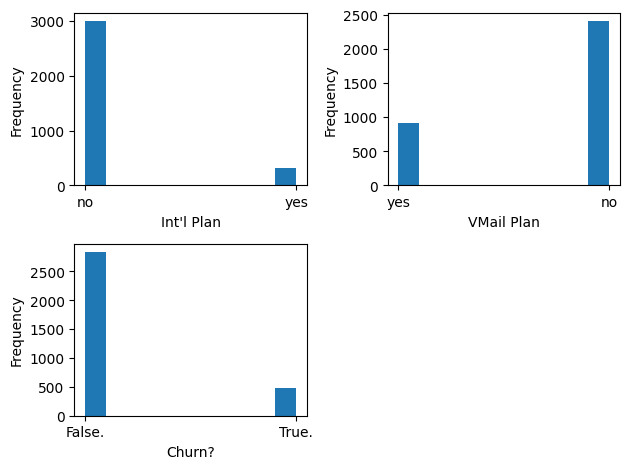

In [18]:
plt.subplot(2,2,1)
plt.hist(cleaned_df["Int'l Plan"])
plt.xlabel("Int'l Plan")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(cleaned_df["VMail Plan"])
plt.xlabel("VMail Plan")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
plt.hist(cleaned_df["Churn?"])
plt.xlabel("Churn?")
plt.ylabel("Frequency")

plt.tight_layout()

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Visualize the distribution of numeric attributes
# numeric_attributes = ['Account Length', "Day Mins", "Day Calls", "Day Charge","Eve Mins",
#                       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 
#                       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']
# for attr in numeric_attributes:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(data=cleaned_df, x=attr, hue='Churn?', kde=True, multiple='stack', bins=20)
#     plt.title(f'Distribution of {attr} by Churn')
#     plt.xlabel(attr)
#     plt.ylabel('Frequency')
#     plt.legend(title='Churn?')
#     plt.show()

# # Visualize categorical attributes
# categorical_attributes = ['State', 'Area Code', 'Int\'l Plan', 'VMail Plan']
# for attr in categorical_attributes:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(data=cleaned_df, x=attr, hue='Churn?')
#     plt.title(f'Distribution of {attr} by Churn')
#     plt.xlabel(attr)
#     plt.ylabel('Count')
#     plt.legend(title='Churn')
#     plt.show()


In [20]:
cleaned_df['Churn?'] = cleaned_df['Churn?'].map({'True.': 1, 'False.': 0})
cleaned_df["Int'l Plan"] = cleaned_df["Int'l Plan"].map({'yes': 1, 'no': 0})
cleaned_df["VMail Plan"] = cleaned_df["VMail Plan"].map({'yes': 1, 'no': 0})

correlation_scores = cleaned_df.corr()['Churn?'].drop('Churn?')

print("Correlation scores of attributes with 'Churn':")
print(correlation_scores)

Correlation scores of attributes with 'Churn':
Account Length    0.017172
Area Code         0.005773
Int'l Plan        0.260658
VMail Plan       -0.101612
VMail Message    -0.089253
Day Mins          0.204918
Day Calls         0.017612
Eve Charge        0.092232
Night Mins        0.037027
Intl Mins         0.069012
Intl Calls       -0.052495
Intl Charge       0.069028
Name: Churn?, dtype: float64


C:\Users\sandr\AppData\Local\Temp\ipykernel_844\925372673.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = cleaned_df.corr()['Churn?'].drop('Churn?')


In [21]:
class_counts = cleaned_df['Churn?'].value_counts()

class_proportions = class_counts / cleaned_df.shape[0]

print("Class Distribution:")
print(class_proportions)

Class Distribution:
0    0.854688
1    0.145312
Name: Churn?, dtype: float64


In [22]:
cleaned_df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,0,1,25.0,265.1,110.0,45.07,...,99,16.78,244.7,91,11.01,10.0,3.0,2.70,1,0
1,OH,107.0,415.0,371-7191,0,1,26.0,161.6,123.0,27.47,...,103,16.62,254.4,103,11.45,13.7,3.0,3.70,1,0
2,NJ,137.0,415.0,358-1921,0,0,0.0,243.4,114.0,41.38,...,110,10.30,162.6,104,7.32,12.2,5.0,3.29,0,0
3,OH,84.0,408.0,375-9999,1,0,0.0,299.4,71.0,50.9,...,88,5.26,196.9,89,8.86,6.6,7.0,1.78,2,0
4,OK,75.0,415.0,330-6626,1,0,0.0,166.7,113.0,28.34,...,122,12.61,186.9,121,8.41,10.1,3.0,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,AZ,192.0,415.0,414-4276,0,1,36.0,156.2,77.0,26.55,...,126,18.32,279.1,83,12.56,9.9,6.0,2.67,2,0
3324,WV,68.0,415.0,370-3271,0,0,0.0,231.1,57.0,39.29,...,55,13.04,191.3,123,8.61,9.6,4.0,2.59,3,0
3325,RI,28.0,510.0,328-8230,0,0,0.0,180.8,109.0,30.74,...,58,24.55,191.9,91,8.64,14.1,6.0,3.81,2,0
3326,CT,184.0,510.0,364-6381,1,0,0.0,213.8,105.0,36.35,...,84,13.57,139.2,137,6.26,5.0,10.0,1.35,2,0


In [23]:
# numeric_attributes = ['Account Length', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 
#                       'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls']

# # Create scatter plots
# for attribute in numeric_attributes:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(data=cleaned_df, x=attribute, y='Churn?', hue='Churn?', alpha=0.5)
#     plt.title(f'Scatter plot of {attribute} vs. Churn')
#     plt.xlabel(attribute)
#     plt.ylabel('Churn')
#     plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
#     plt.grid(True)
#     plt.show()

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot histograms for numeric attributes
# numeric_attributes = df.select_dtypes(include=['float64', 'int64']).columns
# for col in numeric_attributes:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=df, x=col, kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()
#     print(col)
#     while col=="Unnamed: 21":
#         break


C:\Users\sandr\AppData\Local\Temp\ipykernel_844\4262812582.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df[numeric_attributes_with_churn].corr()


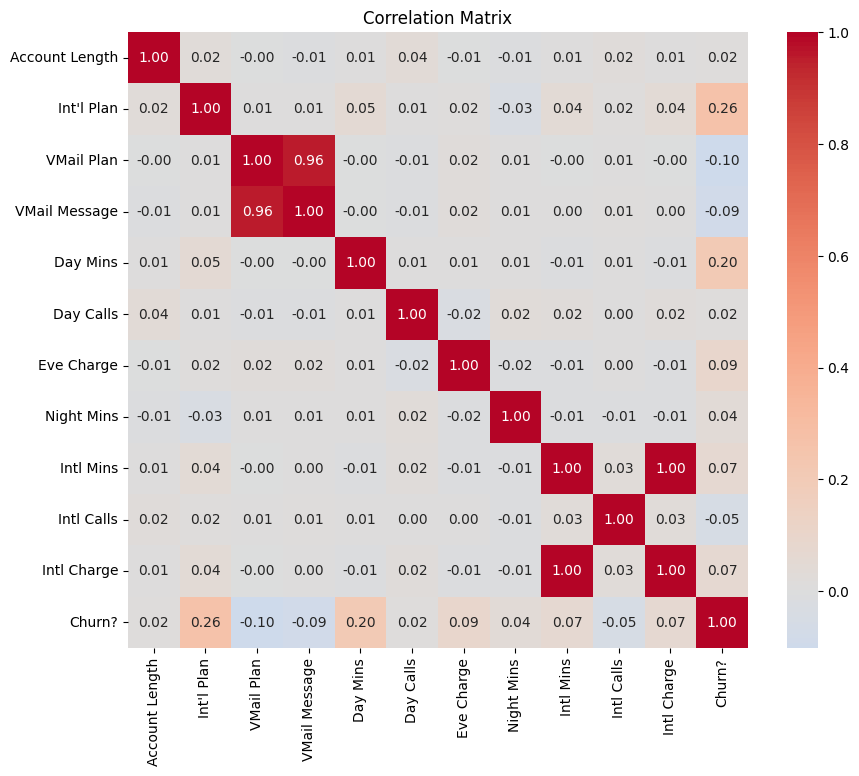

In [25]:
#Correlation

numeric_attributes = ['Account Length',"Int'l Plan","VMail Plan","VMail Message",
                    'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 
                    'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 
                    'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls','Churn?']
numeric_attributes_with_churn = numeric_attributes

correlation_matrix = cleaned_df[numeric_attributes_with_churn].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix')
plt.show()

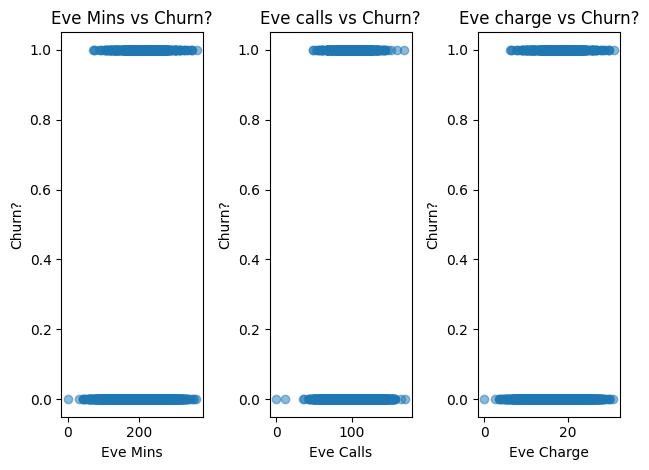

In [26]:
plt.subplot(1,3,1)
plt.scatter(cleaned_df["Eve Mins"], cleaned_df['Churn?'], alpha=0.5)
plt.xlabel("Eve Mins")
plt.ylabel('Churn?')
plt.title('Eve Mins vs Churn?')

plt.subplot(1,3,2)
plt.scatter(cleaned_df["Eve Calls"], cleaned_df['Churn?'], alpha=0.5)
plt.xlabel("Eve Calls")
plt.ylabel('Churn?')
plt.title('Eve calls vs Churn?')

plt.subplot(1,3,3)
plt.scatter(cleaned_df["Eve Charge"], cleaned_df['Churn?'], alpha=0.5)
plt.xlabel("Eve Charge")
plt.ylabel('Churn?')
plt.title('Eve charge vs Churn?')
plt.tight_layout() 

<Axes: >

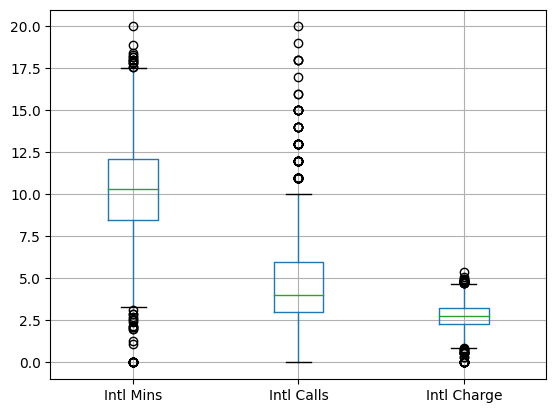

In [27]:
cleaned_df.boxplot(column=["Intl Mins","Intl Calls","Intl Charge"])

Intl Mins & Intl Charge are normally distributed. Intl Calls has median closer to Q1 which implies that it is right skewed.

In [28]:
cleaned_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,0,1,25.0,265.1,110.0,45.07,...,99,16.78,244.7,91,11.01,10.0,3.0,2.70,1,0
1,OH,107.0,415.0,371-7191,0,1,26.0,161.6,123.0,27.47,...,103,16.62,254.4,103,11.45,13.7,3.0,3.70,1,0
2,NJ,137.0,415.0,358-1921,0,0,0.0,243.4,114.0,41.38,...,110,10.30,162.6,104,7.32,12.2,5.0,3.29,0,0
3,OH,84.0,408.0,375-9999,1,0,0.0,299.4,71.0,50.9,...,88,5.26,196.9,89,8.86,6.6,7.0,1.78,2,0
4,OK,75.0,415.0,330-6626,1,0,0.0,166.7,113.0,28.34,...,122,12.61,186.9,121,8.41,10.1,3.0,2.73,3,0


In [29]:
cleaned_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [30]:
cleaned_df = cleaned_df[pd.to_numeric(cleaned_df['Night Charge'], errors='coerce').notnull()]

non_numeric_values = pd.to_numeric(cleaned_df['Night Charge'], errors='coerce').isnull().sum()
print(f"Non-numeric values in column 'Night Charge' after removal: {non_numeric_values}")

Non-numeric values in column 'Night Charge' after removal: 0


In [31]:
cleaned_df.to_csv('cleaned_data.csv', index=False)

# CLASSIFICATION

In [32]:
x=cleaned_df[['Account Length',"Int'l Plan","VMail Plan","VMail Message",
            'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 
            'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 
            'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']]
y=cleaned_df.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=40)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2652, 17)
(2652,)
(664, 17)
(664,)


In [34]:
from sklearn.tree import DecisionTreeClassifier

DTmodel=DecisionTreeClassifier()
DTmodel.fit(x_train,y_train)

y_predicted=DTmodel.predict(x_test)

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy=accuracy_score(y_test,y_predicted)

precision = precision_score(y_test, y_predicted)

recall = recall_score(y_test, y_predicted)

f1 = f1_score(y_test, y_predicted)

conf_matrix = confusion_matrix(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9126506024096386
Precision: 0.6976744186046512
Recall: 0.6521739130434783
F1-score: 0.6741573033707865
Confusion Matrix:
[[546  26]
 [ 32  60]]


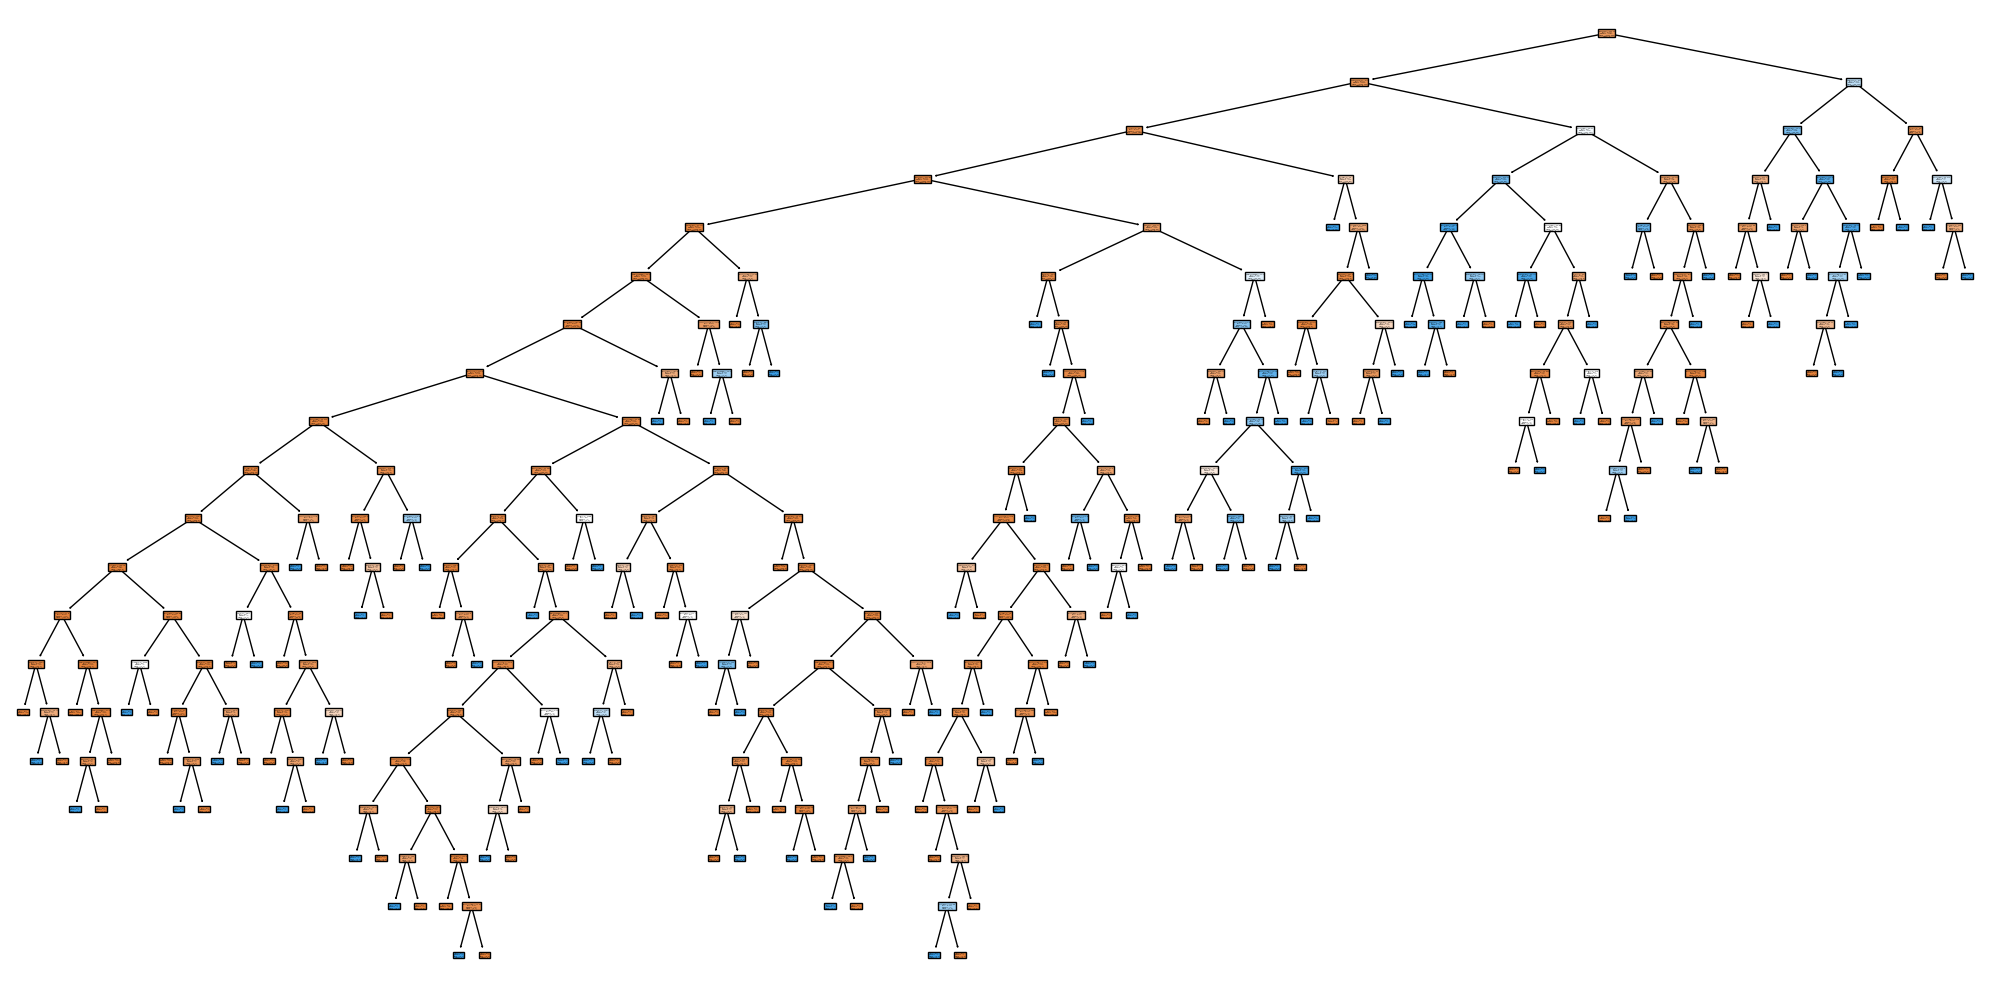

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = x.columns
class_names = [str(class_name) for class_name in y.unique()]

plt.figure(figsize=(20, 10))
plot_tree(DTmodel, feature_names=feature_names, class_names=class_names, filled=True)
plt.tight_layout()
plt.savefig('tree.png', dpi=800)
plt.show()

k fold splitting and decision tree classifier

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_predict

k=10

kf=KFold(n_splits=k,random_state=40, shuffle=True)
model = DecisionTreeClassifier()

predicted = cross_val_predict(model, x, y, cv=kf)

accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

precision = precision_score(y, predicted)
print("Precision:", precision)

recall = recall_score(y, predicted)
print("Recall:", recall)

f1 = f1_score(y, predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9188781664656213
Precision: 0.7195876288659794
Recall: 0.7240663900414938
F1-score: 0.7218200620475699
Confusion Matrix:
[[2698  136]
 [ 133  349]]


In [38]:
k=3

kf=KFold(n_splits=k,random_state=40, shuffle=True)
model = DecisionTreeClassifier()

predicted = cross_val_predict(model, x, y, cv=kf)

accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

precision = precision_score(y, predicted)
print("Precision:", precision)

recall = recall_score(y, predicted)
print("Recall:", recall)

f1 = f1_score(y, predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9134499396863691
Precision: 0.7018633540372671
Recall: 0.7033195020746889
F1-score: 0.7025906735751295
Confusion Matrix:
[[2690  144]
 [ 143  339]]


In [39]:
from sklearn.naive_bayes import GaussianNB
gModel = GaussianNB()

gModel.fit(x_train, y_train)

y_predicted = gModel.predict(x_test)

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_predicted)
print("Precision:", precision)

recall = recall_score(y_test, y_predicted)
print("Recall:", recall)

f1 = f1_score(y_test, y_predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8765060240963856
Precision: 0.5520833333333334
Recall: 0.5760869565217391
F1-score: 0.5638297872340425
Confusion Matrix:
[[529  43]
 [ 39  53]]


In [40]:
k=3

kf=KFold(n_splits=k,random_state=40, shuffle=True)

predicted = cross_val_predict(gModel, x, y, cv=kf)

accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

precision = precision_score(y, predicted)
print("Precision:", precision)

recall = recall_score(y, predicted)
print("Recall:", recall)

f1 = f1_score(y, predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.862183353437877
Precision: 0.5262054507337526
Recall: 0.520746887966805
F1-score: 0.5234619395203337
Confusion Matrix:
[[2608  226]
 [ 231  251]]


In [41]:
k=10

kf=KFold(n_splits=k,random_state=40, shuffle=True)

predicted = cross_val_predict(gModel, x, y, cv=kf)

accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

precision = precision_score(y, predicted)
print("Precision:", precision)

recall = recall_score(y, predicted)
print("Recall:", recall)

f1 = f1_score(y, predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.862183353437877
Precision: 0.525987525987526
Recall: 0.524896265560166
F1-score: 0.5254413291796469
Confusion Matrix:
[[2606  228]
 [ 229  253]]


knn classification and test train split

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(x_train, y_train)

y_predicted = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_predicted)
print("Precision:", precision)

recall = recall_score(y_test, y_predicted)
print("Recall:", recall)

f1 = f1_score(y_test, y_predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8840361445783133
Precision: 0.6829268292682927
Recall: 0.30434782608695654
F1-score: 0.4210526315789474
Confusion Matrix:
[[559  13]
 [ 64  28]]


knn and k fold split

In [43]:
k=10

kf=KFold(n_splits=k,random_state=40, shuffle=True)

predicted = cross_val_predict(knn_classifier, x, y, cv=kf)

accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

precision = precision_score(y, predicted)
print("Precision:", precision)

recall = recall_score(y, predicted)
print("Recall:", recall)

f1 = f1_score(y, predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8802774427020507
Precision: 0.7073170731707317
Recall: 0.3008298755186722
F1-score: 0.4221251819505094
Confusion Matrix:
[[2774   60]
 [ 337  145]]


In [44]:
k=3

kf=KFold(n_splits=k,random_state=40, shuffle=True)

predicted = cross_val_predict(knn_classifier, x, y, cv=kf)

accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

precision = precision_score(y, predicted)
print("Precision:", precision)

recall = recall_score(y, predicted)
print("Recall:", recall)

f1 = f1_score(y, predicted)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8799758745476478
Precision: 0.71
Recall: 0.2946058091286307
F1-score: 0.4164222873900293
Confusion Matrix:
[[2776   58]
 [ 340  142]]


| Split Method | Accuracy | Precision | Recall | F1-score |
|:-----------------------:|:-------------------:|:-------------------:|:-----------------------:|:--------:|
| Simple Train Test splitting (Decision Tree)           | 0.911144578313253   | 0.6853932584269663   | 0.6630434782608695     | 0.6740331491712707   |
| K-fold splitting k=10 (Decision Tree)             | 0.9155609167671894  | 0.6996047430830039   | 0.7344398340248963     | 0.7165991902834008   |
| K-fold splitting k=3 (Decision Tree)           | 0.9140530759951749   | 0.7014314928425358   | 0.7116182572614108     | 0.7064881565396499   |
| Simple Train Test splitting (Naive Bayes)        | 0.8765060240963856   | 0.5520833333333334   | 0.5760869565217391     | 0.5638297872340425   |
| K-fold splitting k=10 (Naive Bayes)        | 0.862183353437877   | 0.525987525987526   | 0.524896265560166     | 0.5254413291796469   |
| K-fold splitting k=3 (Naive Bayes)           | 0.862183353437877  | 0.5262054507337526   | 0.520746887966805     | 0.5234619395203337   |
| Simple Train Test splitting (KNN)             | 0.8840361445783133  | 0.6829268292682927   | 0.30434782608695654     | 0.4210526315789474   |
| K-fold splitting k=10 (KNN)             | 0.8802774427020507  | 0.7073170731707317   | 0.3008298755186722     | 0.4221251819505094   |
| K-fold splitting k=3 (KNN)             | 0.8799758745476478  | 0.71   | 0.2946058091286307    | 0.4164222873900293   |

**Decision Tree Classifier:**

Simple Train Test Splitting: Achieves an accuracy of approximately 91.11%. Precision, recall, and F1-score are also reasonable but slightly lower than the accuracy.

K-fold Splitting k=10: Shows slightly improved performance compared to simple train-test splitting. Accuracy, precision, recall, and F1-score are all higher, indicating better generalization.

K-fold Splitting k=3: Performance is similar to k=10 but with a slightly lower accuracy and F1-score.

**Naive Bayes Classifier:**

Simple Train Test Splitting: Achieves an accuracy of around 87.65%. However, precision, recall, and F1-score are lower compared to the decision tree classifier.

K-fold Splitting k=10 and k=3: Both show similar performance, with accuracy around 86.22%. The precision, recall, and F1-score are consistent with the simple train-test splitting.

**KNN Classifier:**

Simple Train Test Splitting: Shows an accuracy of approximately 88.40%. Precision is relatively high, but recall is lower, indicating potential issues with false negatives.

K-fold Splitting k=10 and k=3: Both exhibit similar performance with accuracy around 88.03% to 88.04%. Precision and recall are consistent with the simple train-test splitting.


**General Observations:**

Decision tree classifiers generally perform better than Naive Bayes and KNN classifiers in terms of accuracy, precision, recall, and F1-score across all splitting methods.

K-fold splitting, particularly with k=10, tends to provide slightly better performance metrics compared to simple train-test splitting, indicating better model generalization.

Naive Bayes classifiers show the lowest performance among the three classifiers, especially in terms of precision and recall, suggesting that it may not capture the underlying patterns in the data as effectively as decision tree and KNN classifiers.

In conclusion, based on these results, the decision tree classifier with k-fold splitting (k=10) appears to be the most suitable model for this dataset, considering both accuracy and other evaluation metrics. However, further analysis, such as feature importance and model complexity considerations, may be necessary for a more comprehensive evaluation.